From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# XGBoost (Extreme Gradient Boosting)

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 학습이 지원되도록 구현되어 병렬 CPU 환경에서 빠르게 학습 가능

In [15]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import numpy as np
import matplotlib.pyplot as plt

## 파이썬 기반 XGBoost

In [20]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [21]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
#     'early_stopping': 100
} 
num_rounds = 400

In [22]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                      early_stopping_rounds=100, evals=evals)

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32222	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	train-logloss:0.13270	eval-logloss:0.15443
[18]	train-logloss:0.12326	eval-logloss:0.14913
[19]	train-logloss:0.11591	eval-logloss:0.14175
[20]	train-logloss:0.10884	eval-logloss:0.13378
[2

In [23]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [24]:
predicts = [1 if x>0.5 else 0 for x in predicts]

In [25]:
print('accuracy: {}'.format(accuracy_score(y_test, predicts)))
print('precision: {}'.format(precision_score(y_test, predicts)))
print('recall: {}'.format(recall_score(y_test, predicts)))

accuracy: 0.9736842105263158
precision: 0.972972972972973
recall: 0.9863013698630136


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

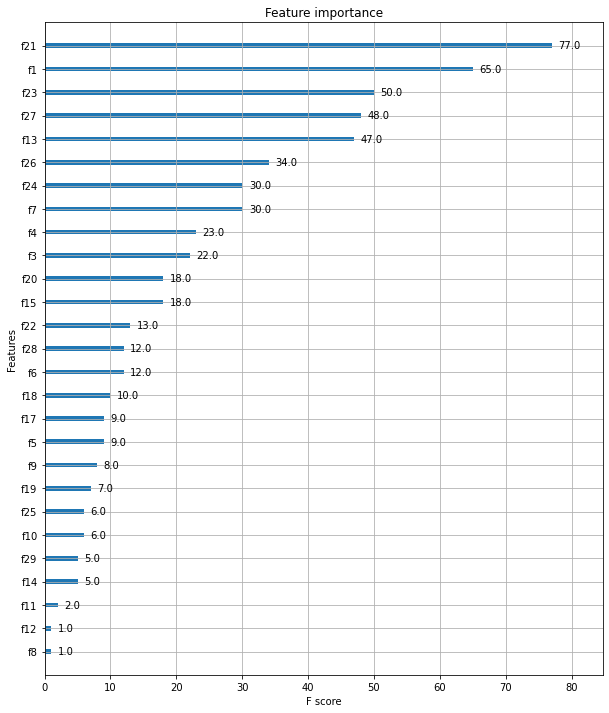

In [26]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax) # 중요도를 그림으로 표시

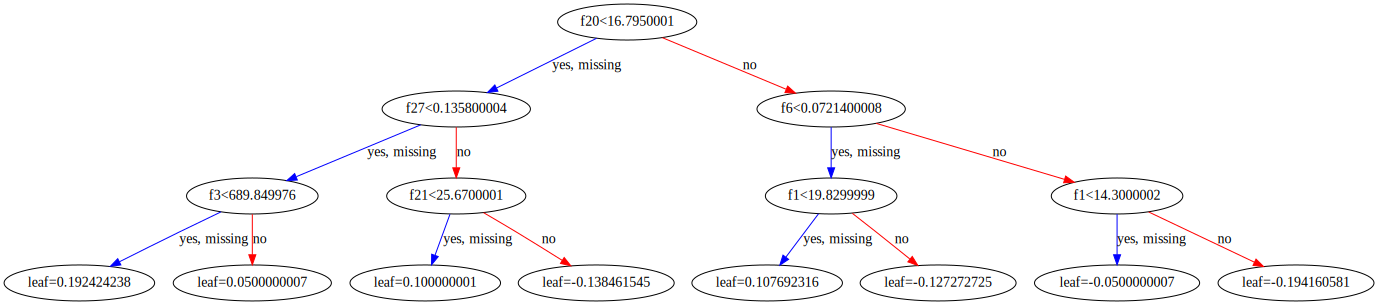

In [34]:
dot_data = xgb.to_graphviz(xgb_model)
# graph = graphviz.Source(dot_data)
# graph
dot_data

## XGBClassifier

### 붓꽃 데이터

In [45]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, random_state=123)

In [47]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, 
                     use_label_encoder=False, eval_metric='mlogloss')
# XGBClssifier will be depreciated. add argument "use_label_encoder=False" and "eval_metric='mlogloss"
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [48]:
cross_val = cross_validate(estimator=xgbc,
                          X=iris.data, y=iris.target,
                          cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 1.1913292407989502 (+/- 0.035227447647099)
avg score time: 0.012782621383666991 (+/- 0.0009716928291682615)
avg test score: 0.96 (+/- 0.024944382578492935)


### 와인 데이터

### 유방암 데이터

## XGBRegressor

### 보스턴 데이터

### 당뇨병 데이터

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할
* 작은 데이터 세트에 사용하는 것은 비추천. 
  -- 행수 제한은 없지만 10,000 이상의 데이터에 사용하는 것을 권유
* overfitting에 민감, 적은 데이터에 대해서 과적합하기 쉬움

## LGBMClassifier

### 붓꽃 데이터

### 와인 데이터

### 유방암 데이터

## LGBMRegressor

### 보스턴 데이터

### 당뇨병 데이터